# NLP Final Project

## Data Cleaning & Topic Modeling
Richard Yang

In [ ]:
import pandas as pd

# Import libraries
import pandas as pd
import numpy as np
import pandas as pd
import nltk
import spacy
from spacy import displacy
import ast
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # Load the English language model
nlp = spacy.load('en_core_web_lg')

# display maximum width of columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

Mounted at /content/drive/
/content/drive/MyDrive/NLP/NLPcode/Final Project


In [ ]:
# Load the Drive helper and mount
import numpy as np
from google.colab import drive
import os
# This will prompt for authorization.
drive.mount('/content/drive/')
path_gdrive = '/content/drive/MyDrive/NLP/NLPcode/Final Project'
os.chdir(path_gdrive)
print(os.getcwd())

Mounted at /content/drive/
/content/drive/MyDrive/NLP/NLPcode/Final Project


In [ ]:
# import spacy.cli
# spacy.cli.download('en_core_web_lg')

In [2]:
%%time

df_news_final_project = pd.read_parquet('https://storage.googleapis.com/msca-bdp-data-open/news_final_project/news_final_project.parquet', engine='pyarrow')
df_news_final_project.shape

CPU times: user 6.16 s, sys: 3.4 s, total: 9.56 s
Wall time: 11 s


(200332, 5)

In [5]:
df_news_final_project = pd.read_parquet('news_final_project.parquet', engine='pyarrow')

In [6]:
# check if all english articles
df_news_final_project = df_news_final_project[df_news_final_project['language'] == 'en']
df_news_final_project.shape

(200332, 5)

In [7]:
df = df_news_final_project.copy()
df.shape

(200332, 5)

In [6]:
%%time
import re
from itertools import chain

# define a regex pattern to match combined English words
combined_words_pattern = r'\b([A-Z][a-z]+){2,}\b'

# define a function to clean text
def clean_text(text, title):
    # combine title and text
    combined_text = f'{title}. {text}'
    # split the text by special characters
    testtext1 = re.split(r'[\r\n\t\/\|\[\]]', combined_text)
    testtext1 = [x for x in testtext1 if x != '']
    # delete the strings that shorter than 10 words
    testtext1 = [x for x in testtext1 if len(x.split()) > 10]
    # delete the spaces in the beginning and end of the string
    testtext1 = [x.strip() for x in testtext1]
    # split the text by comma
    testtext1 = [re.split(r'[\,]', x) for x in testtext1]
    # flatten the list of sentences
    testtext1 = list(chain.from_iterable(testtext1))
    # remove the first three sentences containing combined English words
    count = 0
    new_testtext1 = []
    for sentence in testtext1:
        if re.search(combined_words_pattern, sentence) and count < 2 and len(sentence.split()) > 15:
            count += 1
        else:
            new_testtext1.append(sentence)
    testtext1 = new_testtext1
    # delete the sentences that contain 'http' or 'https' or 'www'
    testtext1 = [x for x in testtext1 if not re.search(r'http|https|www', x)]
    # delete sentences that contain the title
    testtext1 = [x for x in testtext1 if not re.search(re.escape(title), x)]

    # Join the Sentences
    testtext1 = ','.join(testtext1)
 
    # delete the special characters in the beginning and end of the string
    testtext1 = re.sub(r'^\W+|\W+$', '', testtext1)

    return testtext1

# apply the clean_text function to df
df['clean_text'] = df.apply(lambda x: clean_text(x['text'], x['title']), axis=1)


CPU times: user 6min 7s, sys: 2.06 s, total: 6min 9s
Wall time: 6min 9s


In [12]:
# to parquet of df
df.to_parquet('clean_text11.parquet', engine='pyarrow')

In [2]:
df_clean= pd.read_parquet('clean_text11.parquet', engine='pyarrow')

In [3]:
#delete the rows that contain less than 10 words
df_filtered = df_clean[df_clean['clean_text'].apply(lambda x: len(x.split()) > 50)]
df_filtered.shape

(196930, 6)

In [7]:
# filter the rows that are related to the AI topic

list = ['[Aa]rtificial [Ii]ntelligence',
        '[Mm]achine [Ll]earning',
        '[Dd]eep [Ll]earning',
        '[Nn]eural [Nn]etworks',
        '[Cc]onvolutional [Nn]eural [Nn]etworks',
        '[Rr]ecurrent [Nn]eural [Nn]etworks',
        '[Nn]atural [Ll]anguage [Pp]rocessing',
        '[Dd]ata [Mm]ining',
        '[Bb]ig [Dd]ata',
        '[Dd]ata [Ss]cience',
        '[Dd]ata [Aa]nalytics',
        '[Pp]redictive [Aa]nalytics',
        '[Mm]achine [Vv]ision',
        '[Ii]mage [Rr]ecognition',
        '[Oo]bject [Dd]etection',
        '[Ss]emantic [Ss]egmentation',
        '[Ee]motion [Rr]ecognition',
        '[Ff]acial [Rr]ecognition',
        '[Vv]oice [Rr]ecognition',
        '[Aa]utomated [Tt]esting',
        '[Aa]utomated [Rr]easoning',
        '[Kk]nowledge [Rr]epresentation',
        '[Rr]obotics',
        '[Aa]utonomous [Vv]ehicles',
        '[Cc]ognitive [Aa]rchitecture',
        '[Cc]omputational [Ii]ntelligence',
        '[Ss]warm [Ii]ntelligence',
        '[Ee]volutionary [Cc]omputation',
        '[Ff]uzzy [Ll]ogic',
        '[Aa]rtificial [Ll]ife',
        '[Gg]enetic [Aa]lgorithms',
        '[Nn]euroevolution',
        '[Nn]euroscience [Ii]nspired [Aa]rtificial [Ii]ntelligence',
        '[Aa]ugmented [Rr]eality',
        '[Vv]irtual [Rr]eality',
        '[Gg]enerative [Aa]dversarial [Nn]etworks',
        '[Tt]ransformer [Mm]odels',
        '[Bb]ayesian [Nn]etworks',
        '[Hh]idden [Mm]arkov [Mm]odels',
        '[Ss]upport [Vv]ector [Mm]achines',
        '[Ee]xtreme [Ll]earning [Mm]achines',
        '[Rr]einforcement [Ll]earning',
        '[Qq]-learning',
        '[Aa]dversarial [Ll]earning',
        '[Gg]radient [Dd]escent',
        '[Bb]ackpropagation',
        '[Oo]ptimization [Aa]lgorithms',
        '[Ll]ogistic [Rr]egression',
        '[Ss]entiment [Aa]nalysis',
        '[Ss]ocial [Nn]etwork [Aa]nalysis',
        '[Cc]omputer [Vv]ision',
        '[Ii]mage [Pp]rocessing',
        '[Ii]mage [Gg]eneration',
        '[Ii]mage [Cc]lassification',
        '[Ii]mage [Rr]ecognition',
        '[Cc]hat [Bb]ots',
        '[Nn]atural [Ll]anguage [Gg]eneration'
        '[Cc]hat GPT',
        '[Cc]onversational AI',
        'AI'
        '[Cc]hatGPT']



In [10]:
%%time
# define a function to filter the rows that are related to the AI topic
def filter_AI(text):

    for pattern in list:
        if re.search(pattern, text):
            return True
    return False

# apply the filter_AI function to df
df_filtered['AI_related'] = df_filtered['clean_text'].apply(lambda x: filter_AI(x))

df_filtered['AI_related'].value_counts()

CPU times: user 40 s, sys: 0 ns, total: 40 s
Wall time: 40 s


True     153957
False     42973
Name: AI_related, dtype: int64

In [11]:
df_filtered_keywords = df_filtered[df_filtered['AI_related'] == True]
df_filtered_keywords.shape

(153957, 7)

In [58]:
# take a 100 rows sample from df
df_sample = df.sample(n=100, random_state=1)
import regex as re
# import chain from itertools
from itertools import chain

In [34]:
import re

def extract_source(url):
    pattern = r'https?:\/\/(?:www\.)?(.*?)\.'
    match = re.search(pattern, url)
    if match:
        return match.group(1)
    else:
        return None

# apply the extract_source function to df
df['source'] = df['url'].apply(lambda x: extract_source(x))

In [46]:
# find the highest frequency of the sources
df['source'].value_counts()
# find the median of the sources count
df['source'].value_counts().median()
# find the number of sources that their count is higher than the median 4
df['source'].value_counts()[df['source'].value_counts() > 200].count()
# find the number of rows that their count is larger than the median 4
df['source'].value_counts()[df['source'].value_counts() > 100].sum()

143169

In [ ]:
# create a list of sources that their count is higher than the median
list = df['source'].value_counts()[df['source'].value_counts() > 30].index.tolist()
list
# financiallist = ['forbes','finance','economist','wsj']

In [66]:
business_finance = ['finance','wsj','americanbankingnews', 'nytimes','nasdaq', 'businesschief', 'finanznachrichten', 'benzinga', 'marketscreener', 'moneycontrol', 'economictimes', 'marketmirror24', 'businessinsider', 'wsj', 'cnbc', 'marketwatch', 'investorplace', 'fiercebiotech', 'fool', 'investing', 'seekingalpha', 'businesswire', 'zacks', 'etfdailynews', 'dailymail', 'fortune', 'bloomberg', 'reuters']

technology = ['venturebeat', 'techradar', 'it-online', 'devdiscourse', 'techcrunch', 'zdnet', 'techrepublic', 'engadget', 'cnet', 'siliconrepublic', 'tomshardware', 'tomsguide', 'digitaltrends', 'wired', 'gizmodo', 'engadget', 'arstechnica', 'techspot', 'pcmag', 'futurism', 'slashgear']

science = ['safetylit', 'coursera', 'phys', 'newswise', 'forextv', 'eurekalert', 'phys', 'technologyreview', 'newscientist', 'scientificamerican', 'nature', 'scitechdaily', 'sciencealert']

health = ['news-medical', 'medicalxpress', 'nih', 'healthline', 'sciencedaily', 'webmd', 'mayoclinic', 'medscape', 'mdlinx', 'bmj', 'cdc', 'who']

entertainment = ['variety', 'hollywoodreporter', 'eonline', 'tmz', 'entertainmentweekly', 'billboard', 'vulture', 'deadline', 'justjared', 'rollingstone', 'mtv']

sports = ['espn', 'bleacherreport', 'sportsillustrated', 'cbssports', 'nba', 'nfl', 'mlb', 'nhl', 'foxsports', 'skysports', 'goal', 'bbc', 'sportingnews', 'eurosport']


technology_science = technology + science + health
entertainment_sports = entertainment + sports
business_finance = business_finance
combined = technology_science + entertainment_sports + business_finance
# check the number of rows that their source is in the list
df['source'].isin(combined).value_counts()

source
False    175306
True      25026
Name: count, dtype: int64

In [91]:
# filter the rows that their source is in the list combined
df_sentiment = df[df['source'].isin(entertainment_sports)]
df_sentiment.shape

# 

(337, 6)

In [1]:
import os
import time
import math
import re
from pprint import pprint
from textblob import TextBlob
import pandas as pd
import numpy as np

import nltk as nltk
from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import multiprocessing
import string


import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis.gensim
import pyLDAvis
## The version of pyLDAvis must be 3.4.0 to install the following package
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


c:\Users\Richa\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [11]:
# !pip install pyLDAvis==3.4.0

In [12]:
num_processors = multiprocessing.cpu_count()
num_processors

workers = num_processors-1

print(f'Using {workers} workers')

Using 7 workers


In [13]:
import warnings

# warnings.simplefilter('once')
warnings.simplefilter('ignore')
# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

In [14]:
#select rows that needed
df_LDA = df_filtered_keywords.copy()
df_LDA = df_LDA[['title', 'clean_text']]

In [15]:
#read parquet
df_LDA.to_parquet('lda.parquet', engine='pyarrow')

In [5]:
df_LDA = pd.read_parquet('lda.parquet', engine='pyarrow')

In [6]:
# df_sampleLDA = df_LDA.sample(n=100, random_state=1)

In [7]:
# df_sampleLDA.head(1)

In [8]:
%%time

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
        
data_list = df_LDA['clean_text'].tolist()        
data_tokens = [x for x in sent_to_words(data_list)]

CPU times: user 5min 58s, sys: 3.97 s, total: 6min 2s
Wall time: 6min 2s


In [9]:
%%time

# bigram = gensim.models.Phrases(data_tokens, min_count=5, threshold=100)
# trigram = gensim.models.Phrases(bigram[data_tokens], threshold=100)

bigram = gensim.models.Phrases(data_tokens, min_count=1, threshold=1)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=1)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

CPU times: user 10min 53s, sys: 2.08 s, total: 10min 55s
Wall time: 10min 55s


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
%%time

stop_words = stopwords.words('english')

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_
         for token in doc if token.pos_ in allowed_postags])
    return texts_out

CPU times: user 3.87 ms, sys: 0 ns, total: 3.87 ms
Wall time: 2.48 ms


In [12]:
%%time

# Remove Stop Words
data_tokens_nostops = remove_stopwords(data_tokens)

# Create n-grams
data_words_bigrams = make_bigrams(data_tokens_nostops)
data_words_trigrams = make_trigrams(data_tokens_nostops)

# Combine tokens and n-grams
# data_tokens_cobnined = data_tokens_nostops + data_words_bigrams + data_words_trigrams
data_tokens_cobnined = data_words_trigrams

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Lemmatize text keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_tokens_cobnined, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

CPU times: user 1h 10min 59s, sys: 14 s, total: 1h 11min 13s
Wall time: 1h 11min 13s


In [13]:
%%time

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_lemmatized)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_lemmatized]

CPU times: user 1min 27s, sys: 1.07 s, total: 1min 28s
Wall time: 1min 28s


In [20]:
# store the results for data_lemmatized, dictionary, and doc_term_matrix into a pickle file
import pickle
data_lemmatized = pickle.load(open('data_lemmatized.pkl', 'rb'))



In [21]:
dictionary.save('dictionary.gensim')

In [22]:
pickle.dump(doc_term_matrix, open('doc_term_matrix.pkl', 'wb'))

In [13]:
#read
import pickle
data_lemmatized = pickle.load(open('data_lemmatized.pkl', 'rb'))

In [14]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')

In [15]:
doc_term_matrix = pickle.load(open('doc_term_matrix.pkl', 'rb'))

In [16]:
len(doc_term_matrix)

153957

In [28]:
%%time

lda_model = LdaMulticore(corpus=doc_term_matrix,
                   id2word=dictionary,
                   num_topics=3,
                   random_state=100,
                   passes=10,
                   eta='auto',
                   workers=workers)

CPU times: user 6min 18s, sys: 17.8 s, total: 6min 36s
Wall time: 6min 14s


In [29]:
# Print the Keyword in the 3 topics
print(lda_model.print_topics())
doc_lda = lda_model[doc_term_matrix]

[(0, '0.033*"market" + 0.009*"report" + 0.008*"global" + 0.008*"industry" + 0.008*"analysis" + 0.008*"forecast" + 0.006*"ai" + 0.006*"artificial_intelligence" + 0.005*"company" + 0.005*"growth"'), (1, '0.017*"ai" + 0.008*"use" + 0.006*"datum" + 0.006*"technology" + 0.005*"company" + 0.004*"work" + 0.004*"solution" + 0.003*"make" + 0.003*"need" + 0.003*"new"'), (2, '0.010*"ai" + 0.009*"say" + 0.008*"use" + 0.005*"company" + 0.004*"technology" + 0.004*"make" + 0.004*"chatgpt" + 0.004*"new" + 0.003*"work" + 0.003*"get"')]


In [30]:
%%time

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4100062024700791
CPU times: user 21.3 s, sys: 5.21 s, total: 26.5 s
Wall time: 2min 12s


In [17]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = LdaMulticore(corpus=doc_term_matrix,
                       id2word=dictionary,
                       num_topics=k,
                       random_state=100,                  
                       passes=10,
                       alpha=a,
                       eta=b,
                       workers=workers)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [18]:
start_time = time.time()

def tic():
    global start_time 
    start_time = time.time()

def tac():
    t_sec = round(time.time() - start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print(f'Execution time to calculate for topic {k}: {t_hour}hour:{t_min}min:{t_sec}sec'.format(t_hour,t_min,t_sec))

In [19]:
%%time

grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 3
max_topics = 8
step_size = 1
topics_range = range(min_topics, max_topics+2, step_size)

# Alpha parameter
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')
alpha = ['symmetric'] # Run for number of topics only

# Beta parameter
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')
beta = ['auto'] # Run for number of topics only


# Validation sets
num_of_docs = len(doc_term_matrix)
corpus_sets = [# gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75)]
               # doc_term_matrix]
# corpus_title = ['75% Corpus', '100% Corpus']
corpus_title = ['75% Corpus']
model_results = {
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

itr = 0
itr_total = len(beta)*len(alpha)*len(topics_range)*len(corpus_title)
print(f'LDA will execute {itr_total} iterations')

    
# iterate through hyperparameters
for i in range(len(corpus_sets)):
    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        tic()
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                itr += 1
                cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                              k=k, a=a, b=b)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                pct_completed = round((itr / itr_total * 100),1)
#                 print(f'Completed Percent: {pct_completed}%, Corpus: {corpus_title[i]}, Topics: {k}, Alpha: {a}, Beta: {b}, Coherence: {cv}')
        print(f'Completed model based on {k} LDA topics. Finished {pct_completed}% of LDA runs')
        tac()
                    
lda_tuning = pd.DataFrame(model_results)


LDA will execute 7 iterations
Completed model based on 3 LDA topics. Finished 14.3% of LDA runs
Execution time to calculate for topic 3: 0hour:8min:29sec
Completed model based on 4 LDA topics. Finished 28.6% of LDA runs
Execution time to calculate for topic 4: 0hour:9min:18sec
Completed model based on 5 LDA topics. Finished 42.9% of LDA runs
Execution time to calculate for topic 5: 0hour:10min:41sec
Completed model based on 6 LDA topics. Finished 57.1% of LDA runs
Execution time to calculate for topic 6: 0hour:12min:33sec
Completed model based on 7 LDA topics. Finished 71.4% of LDA runs
Execution time to calculate for topic 7: 0hour:14min:0sec
Completed model based on 8 LDA topics. Finished 85.7% of LDA runs
Execution time to calculate for topic 8: 0hour:15min:26sec
Completed model based on 9 LDA topics. Finished 100.0% of LDA runs
Execution time to calculate for topic 9: 0hour:17min:10sec
CPU times: user 54min 28s, sys: 10min 16s, total: 1h 4min 44s
Wall time: 1h 27min 36s


In [20]:
lda_tuning.to_csv('news_lda_tuning2.csv', index=False)

In [21]:
lda_tuning_news = pd.read_csv('news_lda_tuning2.csv')
lda_tuning_news

,Topics,Alpha,Beta,Coherence
0,3,symmetric,auto,0.410006
1,4,symmetric,auto,0.444690
2,5,symmetric,auto,0.432428
3,6,symmetric,auto,0.431009
4,7,symmetric,auto,0.440077
5,8,symmetric,auto,0.441507
6,9,symmetric,auto,0.413618


In [22]:
# Best LDA parameters
lda_tuning_news.sort_values(by=['Coherence'], ascending=False).head(10)

,Topics,Alpha,Beta,Coherence
1,4,symmetric,auto,0.444690
5,8,symmetric,auto,0.441507
4,7,symmetric,auto,0.440077
2,5,symmetric,auto,0.432428
3,6,symmetric,auto,0.431009
6,9,symmetric,auto,0.413618
0,3,symmetric,auto,0.410006


In [23]:
# Worst LDA parameters
lda_tuning_news.sort_values(by=['Coherence']).head(10)

,Topics,Alpha,Beta,Coherence
0,3,symmetric,auto,0.410006
6,9,symmetric,auto,0.413618
3,6,symmetric,auto,0.431009
2,5,symmetric,auto,0.432428
4,7,symmetric,auto,0.440077
5,8,symmetric,auto,0.441507
1,4,symmetric,auto,0.444690


In [3]:
# read news_lda_tuning2.csv
lda_tuning_news = pd.read_csv('news_lda_tuning2.csv')

In [5]:
lda_tuning_news

,Topics,Alpha,Beta,Coherence
0,3,symmetric,auto,0.410006
1,4,symmetric,auto,0.444690
2,5,symmetric,auto,0.432428
3,6,symmetric,auto,0.431009
4,7,symmetric,auto,0.440077
5,8,symmetric,auto,0.441507
6,9,symmetric,auto,0.413618


<AxesSubplot:title={'center':'LDA Coherence Score For News'}, xlabel='Topics', ylabel='Coherence'>

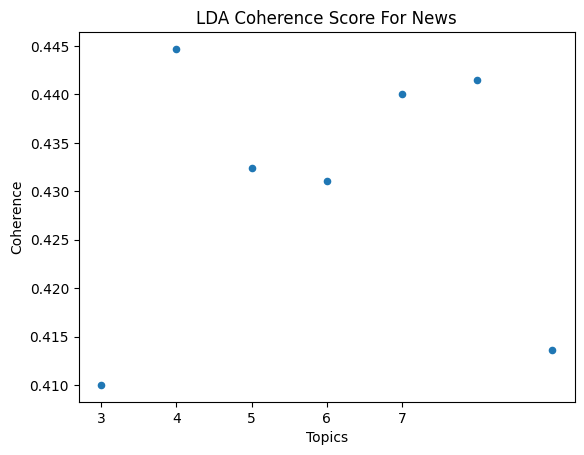

In [9]:
# Scatter plot of LDA coherence scores
lda_tuning_news.plot(x ='Topics', y='Coherence', title = 'LDA Coherence Score For News',kind = 'scatter', xticks=range(3,8))

In [25]:
lda_tuning_best = lda_tuning_news.sort_values(by=['Coherence'], ascending=False).head(1)


tuned_topics = int(lda_tuning_best['Topics'].to_string(index=False))


# Since the values for Alpha and Beta can be float, symmetric and asymmetric, we will either strip or convert to float
try:
    tuned_alpha = float(lda_tuning_best['Alpha'].to_string(index=False))
except:
    tuned_alpha = lda_tuning_best['Alpha'].to_string(index=False).strip()
    

try:
    tuned_beta = float(lda_tuning_best['Beta'].to_string(index=False))
except:
    tuned_beta = lda_tuning_best['Beta'].to_string(index=False).strip()    
    
print(f'Best Parameters: Topics: {tuned_topics}, Alpha: {tuned_alpha}, Beta: {tuned_beta}')

Best Parameters: Topics: 4, Alpha: symmetric, Beta: auto


In [ ]:
%%time

tuned_lda_model = LdaMulticore(corpus=doc_term_matrix,
                       id2word=dictionary,
                       num_topics=tuned_topics,
                       random_state=100,
                       passes=10,
                       alpha=tuned_alpha,
                       eta=tuned_beta,
                       workers = workers)

coherence_model_lda = CoherenceModel(model=tuned_lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
# print('\nCoherence Score: ', coherence_lda)

In [29]:
# print('\nCoherence Score: ', coherence_model_lda)


Coherence Score:  Coherence_Measure(seg=<function s_one_set at 0x7fcdb8b6a7a0>, prob=<function p_boolean_sliding_window at 0x7fcdb8b6aa70>, conf=<function cosine_similarity at 0x7fcdb87a3ac0>, aggr=<function arithmetic_mean at 0x7fcdb87b80d0>)


In [27]:
%%time

lda_display = gensimvis.prepare(tuned_lda_model, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


CPU times: user 1min 33s, sys: 15.7 s, total: 1min 48s
Wall time: 1min 39s


In [1]:
list1 = ['ai','use','say','company','technology','make','datum','work','new','need','also','chatgpt','see','get','time','business','people','go','system','create','way','year','help','include','well','take','tool','come','know']
list2= ['ai','use','say','make','work','new','show','get','time','people','technology','see','datum','need','world','year','model','take','patient','system','go','know','also','study','find','help','research','well','image']
list3 = ['ai','company','press_release','technology','solution','use','datum','statement','platform','prnewswire','reflect','views_opinion','endorse','gray_media_group','provided_courtesy','necessarily_state','customer','new','service','provide','market','industry','support','base','product','information','power','make','business']
list4 = ['ai','use','say','company','technology','make','datum','work','new','need','also','chatgpt','see','get','time','business','people','go','system','create','way','year','help','include','well','take','tool','come','know']
 

#### Ktrain Topic Modelling

In [30]:
# !pip install bokeh --upgrade
# !pip install ktrain --upgrade

In [13]:
import bokeh

print('Bokeh Version: ' + bokeh.__version__)

Bokeh Version: 3.1.1


In [14]:
import ktrain

print('Ktrain Version: ' + ktrain.__version__)

Ktrain Version: 0.37.0


In [16]:
texts = df_filtered_keywords['clean_text'].tolist()
# texts[:5]

In [17]:
%%time
tm = ktrain.text.get_topic_model(
    texts=texts, 
    n_topics=20, 
    n_features=10000, 
    min_df=5, 
    max_df=0.5, 
    stop_words='english', 
    model_type='lda', 
    lda_max_iter=5, 
    verbose=1)

lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
CPU times: user 1h 16min 32s, sys: 1h 59min 7s, total: 3h 15min 40s
Wall time: 27min 50s


In [29]:
# Save the result
output_file = "topic_model.pkl"
tm.save(output_file)
print("Topic model result saved to:", output_file)

Topic model result saved to: topic_model.pkl


In [18]:
tm.print_topics()

topic 0 | research science development industry companies innovation technologies university global work
topic 1 | security statements risk forward-looking financial cyber risks future including cybersecurity
topic 2 | images image content art media music people social like users
topic 3 | digi republic communications reports market shares transactions regulated notification symbol
topic 4 | customer customers experience platform digital best marketing companies service businesses
topic 5 | edge nvidia vision computing applications software systems solutions cloud performance
topic 6 | like human people time make just way used work says
topic 7 | learning machine models model science cloud deep using analytics btc
topic 8 | health medical patients care clinical healthcare patient cancer drug disease
topic 9 | people state rights privacy law work public government police systems
topic 10 | china energy military chinese global oil air international companies defense
topic 11 | best tech 

In [20]:
%%time
tm.build(texts, threshold=0.25)

done.
CPU times: user 12min 16s, sys: 16min 18s, total: 28min 35s
Wall time: 5min 42s


In [21]:
tm.print_topics(show_counts=True)

topic:6 | count:16296 | like human people time make just way used work says
topic:14 | count:15545 | market report analysis global growth key industry forecast research players
topic:15 | count:15145 | gray group media release press platform prnewswire solutions television com
topic:4 | count:11531 | customer customers experience platform digital best marketing companies service businesses
topic:8 | count:10427 | health medical patients care clinical healthcare patient cancer drug disease
topic:16 | count:9860 | chatgpt google openai microsoft chatbot search language generative text users
topic:0 | count:9805 | research science development industry companies innovation technologies university global work
topic:9 | count:9700 | people state rights privacy law work public government police systems
topic:5 | count:7597 | edge nvidia vision computing applications software systems solutions cloud performance
topic:18 | count:6069 | news india students education share read course science onl